# Question 1
Given a fully connected Neural Network as follows: 

a. Input (x1,x2,…,xd): d-nodes 

b. K-hidden fully connected layers with bias of 2d+1 nodes 

c. Output (predict): 1 node 

d. Use Relu activation function for all layers 


### 1. Implement this neural network in pytorch (Use K=10,d=10)

In [2830]:
# https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html
# https://www.cnblogs.com/denny402/p/7593301.html

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.layers = nn.Sequential()
      # define input layer
      self.layers.add_module("input", nn.Linear(10, 21, bias = True))
      self.layers.add_module("hidden0_relu", torch.nn.ReLU())
      # define fc layers
      for i in range(1, 10):
        self.layers.add_module("hidden"+str(i)+"_fc", nn.Linear(21, 21, bias = True))
        self.layers.add_module("hidden"+str(i)+"_relu",torch.nn.ReLU())
      # output layer
      self.layers.add_module("output", nn.Linear(21, 1, bias = True))
    def forward(x):
      self.layers(x)

model = Net()
print(model)

Net(
  (layers): Sequential(
    (input): Linear(in_features=10, out_features=21, bias=True)
    (hidden0_relu): ReLU()
    (hidden1_fc): Linear(in_features=21, out_features=21, bias=True)
    (hidden1_relu): ReLU()
    (hidden2_fc): Linear(in_features=21, out_features=21, bias=True)
    (hidden2_relu): ReLU()
    (hidden3_fc): Linear(in_features=21, out_features=21, bias=True)
    (hidden3_relu): ReLU()
    (hidden4_fc): Linear(in_features=21, out_features=21, bias=True)
    (hidden4_relu): ReLU()
    (hidden5_fc): Linear(in_features=21, out_features=21, bias=True)
    (hidden5_relu): ReLU()
    (hidden6_fc): Linear(in_features=21, out_features=21, bias=True)
    (hidden6_relu): ReLU()
    (hidden7_fc): Linear(in_features=21, out_features=21, bias=True)
    (hidden7_relu): ReLU()
    (hidden8_fc): Linear(in_features=21, out_features=21, bias=True)
    (hidden8_relu): ReLU()
    (hidden9_fc): Linear(in_features=21, out_features=21, bias=True)
    (hidden9_relu): ReLU()
    (output): Li


### 2. Generate the input data (x1,x2,..xd) in [0,1] drawn from a uniform random distribution 

In [2831]:
# https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html
# https://stackoverflow.com/questions/44328530/how-to-get-a-uniform-distribution-in-a-range-r1-r2-in-pytorch

In [2832]:
X = (0 - 1) * torch.rand(10) + 1
X

tensor([0.3025, 0.7411, 0.2502, 0.5824, 0.1498, 0.7468, 0.5463, 0.9406, 0.7144,
        0.7387])


### 3. Generate the labels y = (x1x1+x2x2+…+xd*xd)/d

In [2833]:
y = X.pow(2).sum()/2
y

tensor(1.9309)

### 4. Implement a loss function L = (predict-y)^2

In [2834]:
def Loss(predict, y): return (predict - y).pow(2).sum()

### 5. Use batch size of 1, that means feed data one point at a time into network and compute the loss. Do one time forward propagation with one data point.

In [2835]:
# https://stackoverflow.com/questions/52241680/pytorch-notimplementederror-in-forward
optimizer = torch.optim.SGD(model.layers.parameters(), lr=0.1)
optimizer.zero_grad()
y_pred = model.layers(X)
loss = Loss(y_pred, y)
loss.backward()

In [2836]:
print("Loss = " + str(np.round(loss.item(),5)))

Loss = 2.87628


### 6. Compute the gradients using pytorch autograd: 

a. dL/dw, dL/db 

b. Print these values into a text file: torch_autograd.dat

In [2837]:
with open("torch.autograd.dat", "w") as f:
  f.write("Loss = " + str(np.round(loss.item(),5))+"\n")
  f.write("y_pred: \n" + str(np.round(y_pred.tolist(),5))+"\n")

  for i in model.layers:
    if "Linear" in str(i):
      f.write("\n"+str(i)+"\n")
      f.write("w_gradient: \n" + str(np.round(i.weight.grad.tolist(),5))+"\n")
      f.write("b_gradient: \n" + str(np.round(i.bias.grad.tolist(),5))+"\n")

### 7. Implement the forward propagation and backpropagation algorithm from scratch, without using pytorch autograd, compute the gradients using your implementation 

a. dL/dw, dL/db 

b. Print these values into a text file: my_autograd.dat

In [2838]:
# get layer params
params=[]
for parameter in model.parameters():
    params.append(parameter.detach().numpy())

w_list, b_list = [], []
for i in range(len(params)):
  if i % 2 == 0:
    w_list.append(params[i])
  else: 
    b_list.append(params[i])

In [2839]:
#[i.shape for i in w_list], [i.shape for i in b_list]

In [2840]:
# forward propagation
X0 = X.detach().numpy()
X_list = []

def forward(x, w, b):
  return np.dot(w,x)+b

def relu(x): 
  return np.maximum(0.0, x)

for i in range(11):
  w_now = w_list[i]
  b_now = b_list[i]
  
  if i == 0:
    X_now = forward(X.detach().numpy(), w_list[0], b_list[0])
    X_now = relu(X_now)
    X_list.append(X_now)

  elif 0 < i < 10:
    X_now = forward(X_now, w_now, b_now)
    X_now = relu(X_now)
    X_list.append(X_now)

  else:
    y_result = forward(X_now, w_now, b_now)

In [2841]:
# [x.shape for x in X_list], len(X_list)

In [2842]:
len(X_list), len(w_list), len(b_list)

(10, 11, 11)

In [2843]:
X_list[9].shape

(21,)

In [2844]:
x_final 

array([0.23494892], dtype=float32)

In [2845]:
# backward propagation

def loss_derivative(y_true,y_pred):
    return 2*y_true - 2*y_pred

# d(loss)
dloss = loss_derivative(y_pred, y).detach().numpy()

# d(hidden)
dw_list = []
db_list = [dloss]

for i in range(11):
  idx = 10 - i
  w_now = w_list[idx]
  b_now = b_list[idx]

  if i == 0:
    X_now = X_list[idx-1]
    db_now = db_list[0]
    dw_now = X_now.reshape(len(X_now), 1) * db_now.reshape(1, len(db_now))
    # print(dw_now)

    #db_list.insert(0, db_now)
    dw_list.insert(0, dw_now)
  
  if i == 10:
    db_previous = db_list[0]
    db_now = db_previous @ w_now
    db_now[X0<=0] = 0
    dw_now = X0.reshape(len(X0), 1) * db_now.reshape(1, len(db_now))
    dw_list.insert(0, dw_now)

  else:
    X_now = X_list[idx-1]
    db_previous = db_list[0]
    db_now = db_previous @ w_now
    db_now[X_now<=0] = 0
    dw_now = X_now.reshape(len(X_now), 1) * db_now.reshape(1, len(db_now))
  
    db_list.insert(0, db_now)
    dw_list.insert(0, dw_now)

In [2853]:
layer_names = [str(layer) for layer in model.layers if "Linear" in str(layer)]
layer_names

with open("my_autograd.dat", "w") as f:
  f.write("Loss = " + str(np.round(loss_manual.item(),5))+"\n")
  f.write("y_pred: \n" + str(np.round(y_result,5))+"\n")

  for i in range(11):
    f.write("\n"+str(layer_names[i])+"\n")
    f.write("w_gradient: \n" + str(np.round(dw_list[i].tolist(),5))+"\n")
    f.write("b_gradient: \n" + str(np.round(db_list[i].tolist(),5))+"\n")

### 8. Compare the two files torch_autograd.dat and my_autograd.dat and show that they give the same values up to 5 significant numbers

They are the same

# Question 2

Technically, the code makes a CNN with a 1D convolutional (1D-Conv) layer and 2 fully connected layers. torch.randn is used to generate a 1*10 tensor (hence, shape = (1,1,10)) with values sampled from the standard normal distribution, with requirement of gradient calculation.  The data is first fed into the 1D-Conv layer, which has 1 input channel and 1 output channel, and 3 kernels. Another copy of the data is flattened to 1-dimension. The sum of flattened input and convoluted input are made the input of the first fully connected (FC) layer and the output of the first FC layer is made the input of the second FC layer. The output the second FC layer is compared with the sum of the input data to minimize the difference.

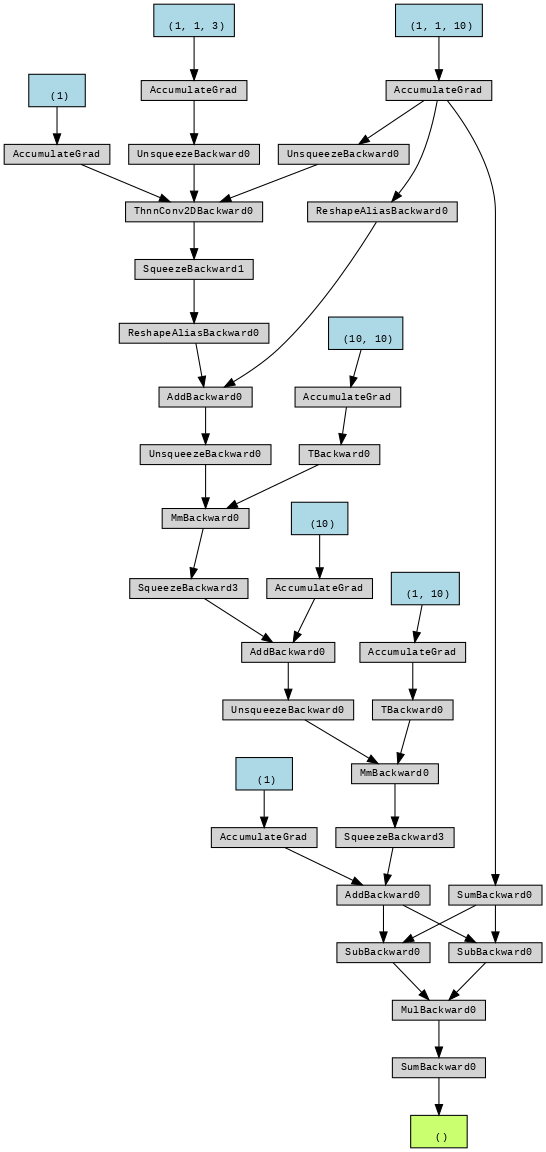

In [2851]:
!pip install torchviz
import torch
import torch.nn as nn
from torchviz import make_dot

# ======================================================

def print_compute_tree(name,node):
  dot = make_dot(node)
  #print(dot)
  dot.render(name, format="png")
  dot.render(name, format="pdf")

# ======================================================

if __name__=='__main__':
  torch.manual_seed(2317)
  x = torch.randn([1,1,10],requires_grad=True)
  cn1 = nn.Conv1d(1,1,3,padding=1)
  fc1 = nn.Linear(10,10)
  fc2 = nn.Linear(10,1)
  y = torch.sum(x)
  c = cn1(x)
  x = torch.flatten(x)+torch.flatten(c) #x1
  x = fc1(x) # x2
  x = fc2(x) # x3
  loss = torch.sum((x-y)*(x-y))
  print_compute_tree('./tree_ex' ,loss)

###################################################
from IPython.display import Image
Image("./tree_ex.png")